# Linear algebra

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from IPython.display import display,Math

## 1 Vectors

In [2]:
row_vec = np.array([4,2])
col_vec = np.array([ [-2], [3] ])

In [3]:
display(Math(sym.latex(sym.sympify(row_vec))))
display(Math(sym.latex(sym.sympify(col_vec))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [4]:
# check out the sizes
print(np.shape(row_vec))
print(np.shape(col_vec))

(2,)
(2, 1)


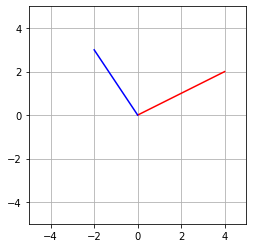

In [5]:
plt.plot([0,row_vec[0]],[0,row_vec[1]],'r',label='row vector')
plt.plot([0,col_vec[0]],[0,col_vec[1]],'b',label='column vector')

plt.axis('square')
plt.axis([-5,5,-5,5])
plt.grid()
plt.show()

### 1.1 Exercises

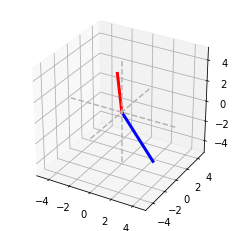

In [6]:
# import 3d plotting tools
from mpl_toolkits.mplot3d import Axes3D


v3_1 = np.array([3,0,-4])
v3_2 = np.array([-1,1,3])

fig = plt.figure(figsize=plt.figaspect(1))
ax = fig.add_subplot(111, projection='3d')

# draw vectors
ax.plot([0,v3_1[0]],[0,v3_1[1]],[0,v3_1[2]],'b',linewidth=3)
ax.plot([0,v3_2[0]],[0,v3_2[1]],[0,v3_2[2]],'r',linewidth=3)

# guidelines
ax.plot([-5,5],[0,0],[0,0],'--',color=[.7,.7,.7])
ax.plot([0,0],[-5,5],[0,0],'--',color=[.7,.7,.7])
ax.plot([0,0],[0,0],[-5,5],'--',color=[.7,.7,.7])

ax.set_xlim3d(-5,5)
ax.set_ylim3d(-5,5)
ax.set_zlim3d(-5,5)
plt.show()

## 2 Adding and scalar-multiplying vectors

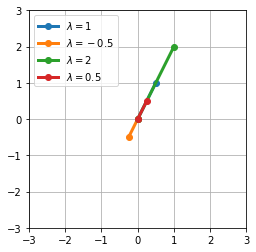

In [7]:
v = np.array([.5,1]) # vector
s = [1,-.5,2,.5] # scalars

for si in s:
    sv = si*v
    plt.plot([0,sv[0]],[0,sv[1]],'o-',linewidth=3,label='$\\lambda=%g$' %(si))
    
plt.axis('square')
plt.legend()
plt.axis([-3,3,-3,3])
plt.grid()
plt.show()

In [8]:
# adding vectors
v1 = np.array([-1,2])
v2 = np.array([1,1])

v3a = v1+v2
v3b = np.add(v1,v2)

v3c = np.zeros(2)
for i in range(0,2):
    v3c[i] = v1[i] + v2[i]

print(v3a,v3b,v3c)

[0 3] [0 3] [0. 3.]


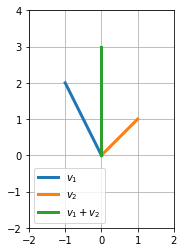

In [9]:
plt.plot([0,v1[0]],[0,v1[1]],label='$v_1$',linewidth=3)
plt.plot([0,v2[0]],[0,v2[1]],label='$v_2$',linewidth=3)
plt.plot([0,v3a[0]],[0,v3a[1]],label='$v_1+v_2$',linewidth=3)

plt.axis('square')
plt.legend()
plt.axis([-2,2,-2,4])
plt.grid()
plt.show()

### 2.1 Exercise

<IPython.core.display.Math object>

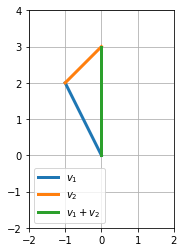

In [10]:
plt.plot([0,v1[0]],[0,v1[1]],label='$v_1$',linewidth=3)
plt.plot([0,v2[0]]+v1[0],[0,v2[1]]+v1[1],label='$v_2$',linewidth=3)
plt.plot([0,v3a[0]],[0,v3a[1]],label='$v_1+v_2$',linewidth=3)

str1 = sym.latex(sym.sympify(v1))
str2 = sym.latex(sym.sympify(v2))
str3 = sym.latex(sym.sympify(v3a))

display(Math('%s+%s=%s' %(str1,str2,str3)))

plt.axis('square')
plt.legend()
plt.axis([-2,2,-2,4])
plt.grid()
plt.show()

## 3 The dot product

In [11]:
v = np.arange(10,20,3)
w = np.arange(5,15,3)
print(w)
dp1 = 0

for i in range(0,len(v)):
    dp1 = dp1 + v[i]*w[i]

[ 5  8 11 14]


In [12]:
dp2 = np.sum( np.multiply(v,w) )
dp3 = np.dot(v,w)
print(dp1,dp2,dp3)

596 596 596


### 3.1 Exercise

In [13]:
# write a function that takes two vectors, tests whether the dot product is valid between them, and returns the dot product or gives an error message

def mydotproduct(v,w):
    
    # squeeze out singleton dimensions
    v = np.squeeze(v)
    w = np.squeeze(w)
    
    # check whether they are the same size
    if len(v)!=len(w):
        raise ValueError('Vectors must have the same length!')
    
    display(Math('v^Tw = %s' %np.dot(v,w)))
    

In [14]:
v1 = np.random.randn(1,10)
v2 = np.random.randn(10,1)

# np.shape(np.squeeze(v2))

mydotproduct(v1,v2)

<IPython.core.display.Math object>

## 4 Dot product application: Correlation coefficient

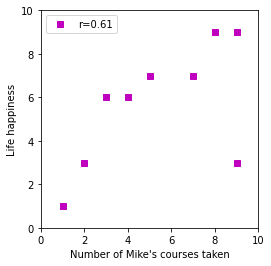

In [15]:
# data
mikes_courses  = [4,5,8,2,9,9,1,3,7]
life_happiness = [6,7,9,3,9,3,1,6,7]

# mean-center
m = mikes_courses - np.mean(mikes_courses)
l = life_happiness - np.mean(life_happiness)

# compute correlation
numer = np.dot(m,l)
denom = np.sqrt( np.dot(m,m) ) * np.sqrt(np.dot(l,l))
r1 = numer/denom

# confirm with numpy function
r2 = np.corrcoef(m,l)[1][0]

# show the data!
plt.plot(mikes_courses,life_happiness,'ms',label='r=%s' %np.round(r1,2))

plt.axis([0,10,0,10])
plt.gca().set_aspect('equal')
plt.xlabel('Number of Mike\'s courses taken')
plt.ylabel('Life happiness')
plt.legend()
plt.show()


## 5 The outer product

In [16]:
v1 = np.random.randn(50)
v2 = np.random.randn(50)

np.dot(v1,v2)

10.363186821952894

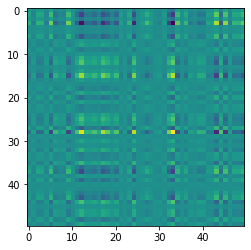

In [17]:
op = np.outer(v1,v2)
# display(Math(sym.latex(sym.sympify(op))))

plt.imshow(op)
plt.show()

### 5.1 Exercise

In [18]:
v = np.arange(1,10)
w = np.arange(1,5)

print(np.outer(v,w))
print(np.outer(w,v))

[[ 1  2  3  4]
 [ 2  4  6  8]
 [ 3  6  9 12]
 [ 4  8 12 16]
 [ 5 10 15 20]
 [ 6 12 18 24]
 [ 7 14 21 28]
 [ 8 16 24 32]
 [ 9 18 27 36]]
[[ 1  2  3  4  5  6  7  8  9]
 [ 2  4  6  8 10 12 14 16 18]
 [ 3  6  9 12 15 18 21 24 27]
 [ 4  8 12 16 20 24 28 32 36]]


In [19]:
# show that svw=vsw=vws
s = 4

left = s*np.outer(v, w)
middle = np.outer(v*s, w)
right = np.outer(v, w)*s

print(np.sum(np.abs(left-middle)))
print(np.sum(np.abs(middle-right)))
print(np.sum(np.abs(left-right)))

0
0
0


## 6 Matrix multiplication

In [20]:
A = np.random.randn(14,10)
B = np.random.randn(14,10)
C = np.random.randn(10,14)

try:
    print((A@B).shape)
except Exception as E:
    print("Exception: {}".format(type(E).__name__))
    print("Exception message: {}".format(E))

print((A@C).shape)
print((C@A).shape)

Exception: ValueError
Exception message: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 14 is different from 10)
(14, 14)
(10, 10)


### 6.1 Exercise

In [21]:
def matrixMultiplication(A,B):
    
    # get matrix sizes
    szA = np.shape(A)
    szB = np.shape(B)
    
    # give error if sizes don't match
    if szA[1]!=szB[0]:
        raise ValueError('"Inner" dimensions don''t match!')
    
    # initialize
    C = np.zeros((szA[0],szB[1]))
    
    # compute!
    for i in range(szA[0]):
        for j in range(szB[1]):
            C[i,j] = np.dot(A[i,:],B[:,j])
            
    return C


In [22]:
A = np.random.randn(4,6)
B = np.random.randn(6,2)

C1 = matrixMultiplication(A,B)
C2 = A@B

print(np.round(C1-C2))

[[ 0.  0.]
 [-0.  0.]
 [ 0.  0.]
 [ 0.  0.]]


## 7 Transposing matrices and vectors

In [23]:
r = np.random.randn(1,10)
c = np.random.randn(10,1)

print(np.shape(r))
print(np.shape(c))

(1, 10)
(10, 1)


In [24]:
r_flip1 = np.transpose(r)
r_flip2 = r.T
print(np.shape(r_flip2))

(10, 1)


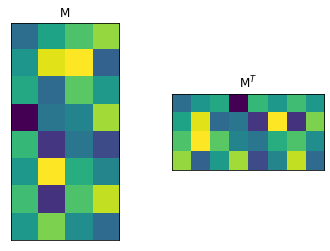

In [25]:
# matrix and image
mat = np.random.randn(8,4)
matT = mat.T

fig,ax = plt.subplots(1,2)
ax[0].imshow(mat)
ax[0].set_title('M')

ax[1].imshow(matT)
ax[1].set_title('M$^T$')

# set common properties
for i in ax:
    i.set_yticks([])
    i.set_xticks([])

plt.show()

### 7.1 Exercise

In [26]:
# show that a matrix times its transpose is square-symmetric

# sizes
m = 10
n = 14

amat = np.random.randn(m,n)

# palindromic variables! (literal and referent!)
amatama = amat@amat.T

# show it's square
print(np.shape(amatama))

# show it's symmetric
amatama - amatama.T

(10, 10)


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

## 8 Various special matrices

In [27]:
# identity
I = np.eye(4)
print(I)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [28]:
# zeros
Z = np.zeros((5,5))
print(Z)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [29]:
# diagonal
D = np.diag([1,3,2,4,5])
print(D)
d = np.diagonal(D)
print(d)

[[1 0 0 0 0]
 [0 3 0 0 0]
 [0 0 2 0 0]
 [0 0 0 4 0]
 [0 0 0 0 5]]
[1 3 2 4 5]


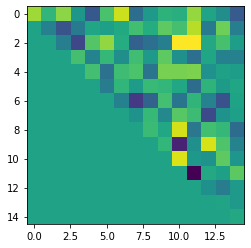

In [30]:
# triangular matrix
T = np.random.randn(15,15)

plt.imshow(np.triu(T))
plt.show()

### 8.1 Exercise

In [31]:
# matrix of random integers
intmat = np.random.randint(-4,5,(4,4))
I4 = np.eye(4)
upper4 = np.triu(np.random.randn(4,4))

print(intmat.dtype)
print('\n\n')
print((intmat@I4).dtype)
print('\n\n')
print(intmat@upper4)

int64



float64



[[ 2.81507237  0.91700058  4.20374781  2.03875853]
 [-2.81507237 -1.51716666 -6.56345538 -4.47271051]
 [ 2.81507237  1.00273859 -0.79287565 -5.86014242]
 [ 2.11130428  1.28791652  1.51222502 -1.40155646]]


[[1 2 3 4 5]
 [2 1 2 3 4]
 [3 2 1 2 3]
 [4 3 2 1 2]
 [5 4 3 2 1]]


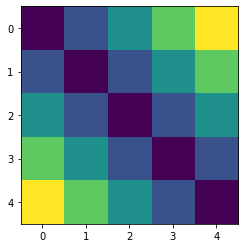

In [32]:
# figure out what a Toeplitz matrix is
from scipy.linalg import toeplitz

v = np.arange(1,6)
toe = toeplitz(v)

print(toe)

plt.imshow(toe)
plt.show()

## 9 Matrix inverse

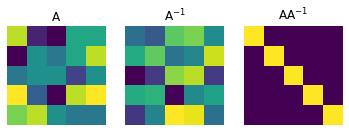

In [33]:
# random matrices are nearly always invertible

m = 5

A = np.random.randint(-5,6,(m,m))
Ainv = np.linalg.inv(A)

fig,ax = plt.subplots(1,3)

ax[0].imshow(A)
ax[0].set_title('A')

ax[1].imshow(Ainv)
ax[1].set_title('A$^{-1}$')

ax[2].imshow(A@Ainv)
ax[2].set_title('AA$^{-1}$')

for i in ax:
    i.axis('off')

plt.show()

In [34]:
# also no inverse for square matrix with repeated columns

A = np.random.randint(-5, 6, (m, m))
A[:, 0] = A[:, 1]
print(A)

try:
    Ainv = np.linalg.inv(A)
except Exception as E:
    print("\n{}: {}".format(type(E).__name__, E))

[[ 4  4 -1  4  5]
 [ 4  4 -1 -2  1]
 [-2 -2 -2  5 -1]
 [-2 -2  0 -5  1]
 [ 2  2  2  4 -1]]

LinAlgError: Singular matrix


### 9.1 Exercise

[[-4 -4  5  5  2]
 [ 4  4  1 -3  3]
 [-3 -3  0  2  0]
 [ 0  0 -5 -3  5]
 [-1 -1 -5 -5 -1]]


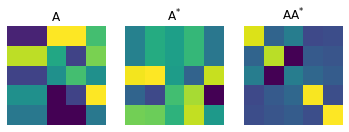

In [35]:
# pinv with repeated column in square matrix, and with non-square matrix
m = 5
A = np.random.randint(-5,6,(m,m))
A[:,0] = A[:,1]
print(A)

# A = np.random.randn(m,m+2)

# compute pseudo-inverse
Ainv = np.linalg.pinv(A)

fig,ax = plt.subplots(1,3)

ax[0].imshow(A)
ax[0].set_title('A')

ax[1].imshow(Ainv)
ax[1].set_title('A$^{*}$')

ax[2].imshow(A@Ainv)
ax[2].set_title('AA$^{*}$')

for i in ax:
    i.axis('off')

plt.show()

## 10 Solving a system of equations
$$
X\beta = y\\
\beta = (X^TX)^{-1}X^Ty
$$

In [36]:
X = np.array([ [2,1,-1],[3,4,2],[1,-5,-2] ])
y = np.array([1,13,0])

b1 = np.linalg.inv(X.T@X) @ (X.T@y)
b2 = np.linalg.solve(X,y)

b1, b2

(array([ 3., -1.,  4.]), array([ 3., -1.,  4.]))

### 10.1 Exercise

In [37]:
# visualize the three possible outcomes of simultaneous equations

# 1) one solution
X1 = np.array([ [3,-1],[-1,1] ])
y1 = np.array([6,2])

# 2) infinite solutions
X2 = np.array([ [3,-1],[1.5,-.5] ])
y2 = np.array([6,3])

# 3) no solutions
X3 = np.array([ [3,-1],[1.5,-.5] ])
y3 = np.array([6,2])

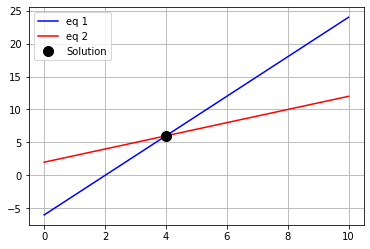

In [38]:
# generate the plot
xlim = np.array([0, 10])

# 1) Case 1: one unique solution

# convert equations into y=mx+b form
yy1 = -X1[0, 0]/X1[0, 1]*xlim + y1[0]/X1[0, 1]
yy2 = -X1[1, 0]/X1[1, 1]*xlim + y1[1]/X1[1, 1]

# plot
plt.plot(xlim, yy1, 'b', label='eq 1')
plt.plot(xlim, yy2, 'r', label='eq 2')

# solve and plot
b1 = np.linalg.solve(X1, y1)
plt.plot(b1[0], b1[1], 'ko', markersize=10, label='Solution')

plt.legend()
plt.grid()
plt.show()


LinAlgError: Singular matrix


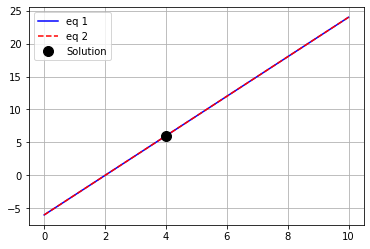

In [39]:
# Case 2: infinite solutions

# convert equations into y=mx+b form
yy1 = -X2[0, 0]/X2[0, 1]*xlim + y2[0]/X2[0, 1]
yy2 = -X2[1, 0]/X2[1, 1]*xlim + y2[1]/X2[1, 1]

# plot
plt.plot(xlim, yy1, 'b', label='eq 1')
plt.plot(xlim, yy2, 'r--', label='eq 2')

# solve and plot
try:
    b1 = np.linalg.solve(X2, y2)
except Exception as E:
    print("\n{}: {}".format(type(E).__name__, E))

plt.plot(b1[0], b1[1], 'ko', markersize=10, label='Solution')

plt.legend()
plt.grid()
plt.show()


LinAlgError: Singular matrix


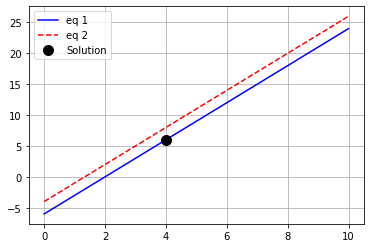

In [40]:
# Case 3: no solutions

# convert equations into y=mx+b form
yy1 = -X3[0, 0]/X3[0, 1]*xlim + y3[0]/X3[0, 1]
yy2 = -X3[1, 0]/X3[1, 1]*xlim + y3[1]/X3[1, 1]

# plot
plt.plot(xlim, yy1, 'b', label='eq 1')
plt.plot(xlim, yy2, 'r--', label='eq 2')

# solve and plot
try:
    b1 = np.linalg.solve(X3, y3)
except Exception as E:
    print("\n{}: {}".format(type(E).__name__, E))

plt.plot(b1[0], b1[1], 'ko', markersize=10, label='Solution')

plt.legend()
plt.grid()
plt.show()

## 11 Visualizing matrix-vector multiplication

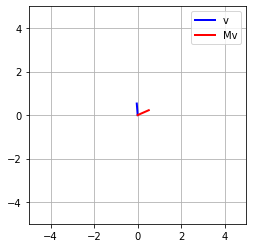

In [41]:
M = np.array([ [.5,1],
               [1,.5] ])

v = np.array([1,2])
v = np.random.randn(2)
# v = np.array([1,1])
# v = np.array([1,-1])

Mv = M@v

plt.plot([0,v[0]],[0,v[1]],'b',label='v',linewidth=2)
plt.plot([0,Mv[0]],[0,Mv[1]],'r',label='Mv',linewidth=2)

plt.axis('square')
plt.axis([-5,5,-5,5])
plt.legend()
plt.grid()

plt.show()

### 11.1 Exercise

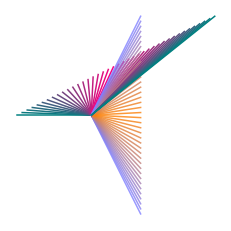

In [42]:
v1 = np.linspace(-2,2,40)

for i in v1:
    
    v = np.array([1,i])
    Mv = M@v
    plt.plot([0,v[0]],[0,v[1]],color=[1-abs(i)/4,.5,abs(i)/2],alpha=.8)
    plt.plot([0,Mv[0]],[0,Mv[1]],color=[1-abs(i)/2,abs(i)/4,.5])
    

plt.axis('square')
plt.axis('off')
plt.show()

## 12 Eigenvalues and eigenvectors

[9.16580782e+01 7.16929499e+01 4.81746555e+01 4.13710545e-04
 2.47390264e+00]


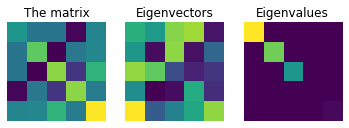

In [43]:
# the matrix
M = np.random.randint(-5,5,(5,5))
M = M@M.T

# its eigendecomposition
eigvals,eigvecs = np.linalg.eig(M)
print(eigvals)

# visualize the matrices
fig,ax = plt.subplots(1,3)

ax[0].imshow(M)
ax[0].set_title('The matrix')

ax[1].imshow(eigvecs)
ax[1].set_title('Eigenvectors')

ax[2].imshow(np.diag(eigvals))
ax[2].set_title('Eigenvalues')

for i in ax:
    i.axis('off')

plt.show()

In [44]:
# but what do they mean??

Mv = M@eigvecs[:,0]
lv = eigvals[0] * eigvecs[:,0]

print(Mv)
print(lv)

[24.50879044 10.55495864 50.41416712  5.67222492 71.52169576]
[24.50879044 10.55495864 50.41416712  5.67222492 71.52169576]


### 12.1 Exercise

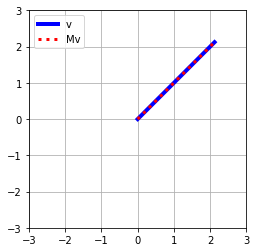

In [45]:
# part 1: 2x2 symmetric matrix. plot Mv and lv 

M = np.array([ [1,2],[2,1] ])
d,V = np.linalg.eig(M)

lv = d[0]*V[:,0] # change to 1 without changing d
Mv = M@V[:,0]

plt.plot([0,lv[0]],[0,lv[1]],'b',label='v',linewidth=4)
plt.plot([0,Mv[0]],[0,Mv[1]],'r:',label='Mv',linewidth=3)

plt.axis('square')
plt.axis([-3,3,-3,3])
plt.legend()
plt.grid()

plt.show()

In [46]:
# part 2: 6x6 symmetric matrix. compute all pairwise dot products of eigenvectors

# the matrix
m = 6
M = np.random.randn(m,m)
M = M@M.T

# its eigendecomposition
d,V = np.linalg.eig(M)

dps = np.zeros((m,m))

for i in range(0,m):
    for j in range(0,m):
        dps[i,j] = np.dot(V[:,i],V[:,j])
        
print(np.round(dps,2))

[[ 1.  0.  0. -0.  0. -0.]
 [ 0.  1. -0. -0. -0.  0.]
 [ 0. -0.  1.  0. -0.  0.]
 [-0. -0.  0.  1. -0.  0.]
 [ 0. -0. -0. -0.  1. -0.]
 [-0.  0.  0.  0. -0.  1.]]


## 13 Singular value decomposition

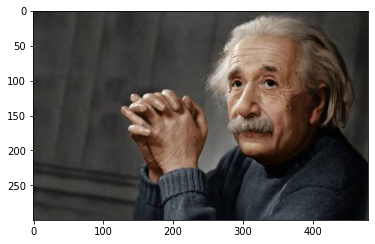

(300, 480, 3)
(300, 480)


In [47]:
# SVD of Einstein
from PIL import Image
ein = Image.open('einstein.jpg')

plt.imshow(ein)
plt.show()

# SVD is defined on 2D matrices
print( np.shape(ein) )
ein = np.mean(ein,2)
print( np.shape(ein) )

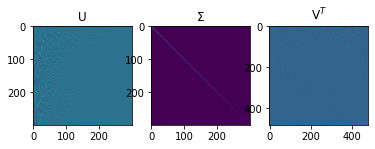

In [48]:
# Take the SVD
U,s,V = np.linalg.svd(ein)

# image the results
fig,ax = plt.subplots(1,3)

ax[0].imshow(U)
ax[0].set_title('U')

ax[1].imshow(np.diag(np.log(s)))
ax[1].set_title('$\\Sigma$')

ax[2].imshow(V)
ax[2].set_title('V$^T$')
plt.show()

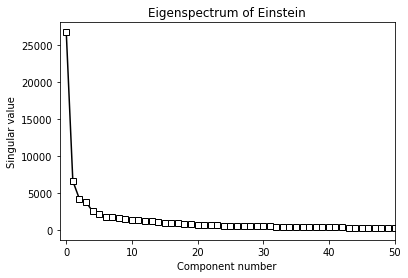

In [49]:
# plot the eigenspectrum

plt.plot(s,'ks-',markerfacecolor='w')
plt.xlim([-1,50])
plt.xlabel('Component number')
plt.ylabel('Singular value')
plt.title('Eigenspectrum of Einstein')
plt.show()

### 13.1 Exercise

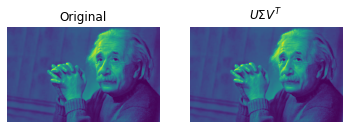

In [50]:
# reconstruct ein, then shuffle the singular values

# reconstruct S from s
S = np.zeros(np.shape(ein))
for i in range(0,len(s)):
    S[i,i] = s[i]

rein = U@S@V

plt.subplot(1,2,1)
plt.imshow(ein)
plt.axis('off')
plt.title('Original')

plt.subplot(1,2,2)
plt.imshow(rein)
plt.axis('off')
plt.title('$U\\Sigma V^T$')

plt.show()

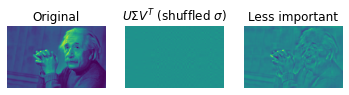

In [51]:
# reconstruct S from s
S = np.zeros(np.shape(ein))

randorder = np.random.permutation(len(s))

for i in range(0, len(s)):
    S[i, i] = s[randorder[i]]

rein = U@S@V

for i in range(5, len(s)):  # 0-10 and 5-end
    S[i, i] = s[i]
lein = U@S@V

plt.subplot(1, 3, 1)
plt.imshow(ein)
plt.axis('off')
plt.title('Original')

plt.subplot(1, 3, 2)
plt.imshow(rein)
plt.axis('off')
plt.title('$U\\Sigma V^T$ (shuffled $\\sigma$)')

plt.subplot(1, 3, 3)
plt.imshow(lein)
plt.axis('off')
plt.title('Less important')

plt.show()

## 14 Linear algebra BUG HUNT solution

### 14.1 create a column vector

In [52]:
cv = np.array([ [-2], [3] ])

display(Math(sym.latex(sym.sympify(cv))))

<IPython.core.display.Math object>

### 14.2 visualize scalar-vector multiplication

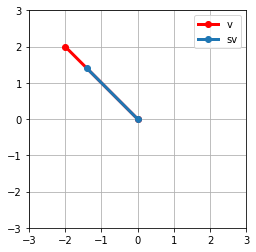

In [53]:
v = np.array([-2,2])
s = .7

sv = s*v
plt.plot([0,v[0]],[0,v[1]],'ro-',linewidth=3,label='v')
plt.plot([0,sv[0]],[0,sv[1]],'o-',linewidth=3,label='sv')
    
plt.axis('square')
plt.legend()
plt.axis([-3,3,-3,3])
plt.grid()
plt.show()

### 14.3 algorithm to compute the dot product

In [54]:
v = np.random.randn(7)
w = np.random.randn(7)

dp1 = 0
for i in range(0,len(v)):
    dp1 += v[i]*w[i]

dp2 = np.dot(v,w)

print(str(dp1) + '\t' + str(dp2))

0.7569954769366126	0.7569954769366126


### 14.4 number of data points

In [55]:
n = 10

# data
data1 = np.arange(0,n) + np.random.randn(n)
data2 = np.arange(0,n) + np.random.randn(n)

# mean-center
data1 -= np.mean(data1)
data2 -= np.mean(data2)

# compute correlation
numer = np.dot(data1,data2)
denom = np.sqrt( np.dot(data1,data1) ) * np.sqrt(np.dot(data2,data2))
r1 = numer/denom

# confirm with numpy function
r2 = np.corrcoef(data1,data2)[1][0]

print(r1)
print(r2)

0.8754461463466162
0.8754461463466159


### 14.5 outer product computation

In [56]:
o1 = np.random.randint(0,10,7)
o2 = np.random.randint(0,10,4)

outermat = np.zeros((len(o1),len(o2)))

for i in range(len(o1)):
    outermat[i,:] = o1[i]*o2
    
print(outermat-np.outer(o1,o2))

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


### 14.6 matrix multiplication

In [57]:
A = np.random.randn(5,5)
I = np.eye(5)

print(A)
print(' ')
print(A@I)

[[-0.90266885  0.8814279  -0.5078707  -0.18544823 -1.24509616]
 [ 1.44186368  0.35130493  0.61810934  0.86302207  1.03846725]
 [ 0.02620677  0.17736263 -1.29205058 -0.87550889 -1.30667276]
 [-0.53155989  0.69150644  0.23249776 -0.61384145  0.07851994]
 [-1.06853249  0.05522767 -0.20411239  0.83051872  0.45931676]]
 
[[-0.90266885  0.8814279  -0.5078707  -0.18544823 -1.24509616]
 [ 1.44186368  0.35130493  0.61810934  0.86302207  1.03846725]
 [ 0.02620677  0.17736263 -1.29205058 -0.87550889 -1.30667276]
 [-0.53155989  0.69150644  0.23249776 -0.61384145  0.07851994]
 [-1.06853249  0.05522767 -0.20411239  0.83051872  0.45931676]]


### 14.7 matrix multiplication

In [58]:
A = np.random.randn(8,5)
I = np.eye(8)

I@A

array([[ 0.44984419, -0.09029573, -1.13793164,  0.09948104,  1.35824744],
       [ 0.35909321,  0.31177402, -0.94546096, -0.19509469,  0.19294578],
       [ 0.7127431 ,  1.03719885,  1.76264662,  0.6459625 ,  0.86061552],
       [-2.20636603, -0.21649087, -1.00707728,  0.27509051,  1.94552847],
       [ 0.32371966,  1.05704634, -0.12483624,  1.48524193, -1.57338762],
       [-0.22028993, -1.48499723, -2.19040162,  0.62230401, -0.66534879],
       [ 0.84944686, -0.59099564, -2.88218321,  0.32148423,  0.75126535],
       [-1.26524202, -1.38691637, -0.20327503, -0.7547095 ,  0.12218538]])

### 14.8 random matrices are invertible

In [59]:
A = np.random.randint(-5,6,(5,5))
Ainv = np.linalg.inv(A)

np.round(A@Ainv,4)

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1., -0.,  0.,  0.],
       [ 0.,  0.,  1., -0.,  0.],
       [-0.,  0., -0.,  1.,  0.],
       [ 0.,  0., -0.,  0.,  1.]])

### 14.9 plot the eigenspectrum

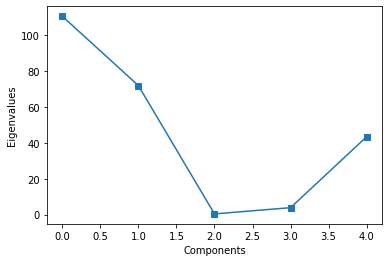

In [60]:
# the matrix
M = np.random.randint(-5,5,(5,5))
M = M@M.T

# its eigendecomposition
eigvals,eigvecs = np.linalg.eig(M)

plt.plot(np.matrix.flatten(eigvals),'s-')
plt.xlabel('Components')
plt.ylabel('Eigenvalues')

plt.show()

### 14.10 Reconstruct a matrix based on its SVD

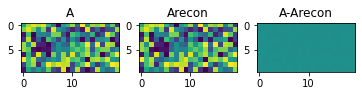

In [61]:
A = np.random.randint(-10,11,(10,20))

U,s,V = np.linalg.svd(A)

# reconstruct S
# S = np.diag(s)
S = np.zeros(np.shape(A))
for i in range(len(s)):
    S[i,i] = s[i]

Arecon = U@S@V

fig,ax = plt.subplots(1,3)

ax[0].imshow(A,vmin=-10,vmax=10)
ax[0].set_title('A')

ax[1].imshow(Arecon,vmin=-10,vmax=10)
ax[1].set_title('Arecon')

ax[2].imshow(A-Arecon,vmin=-10,vmax=10)
ax[2].set_title('A-Arecon')

plt.show()